# Titanic Wrangling

Github Repository: <https://github.com/jonathan-cleave/GSB-544-.git>

In this practice activity you'll continue to work with the titanic dataset in ways that flex what you've learned about both data wrangling and data visualization.

In [10]:
import pandas as pd
# Import the titanic dataset here
data_dir = "https://dlsun.github.io/pods/data/"
df = pd.read_csv(data_dir + "titanic.csv")

df

,name,gender,age,class,embarked,country,ticketno,fare,survived
0,"Abbing, Mr. Anthony",male,42.0,3rd,S,United States,5547.0,7.11,0
1,"Abbott, Mr. Eugene Joseph",male,13.0,3rd,S,United States,2673.0,20.05,0
2,"Abbott, Mr. Rossmore Edward",male,16.0,3rd,S,United States,2673.0,20.05,0
3,"Abbott, Mrs. Rhoda Mary 'Rosa'",female,39.0,3rd,S,England,2673.0,20.05,1
4,"Abelseth, Miss. Karen Marie",female,16.0,3rd,S,Norway,348125.0,7.13,1
...,...,...,...,...,...,...,...,...,...
2202,"Wynn, Mr. Walter",male,41.0,deck crew,B,England,NaN,NaN,1
2203,"Yearsley, Mr. Harry",male,40.0,victualling crew,S,England,NaN,NaN,1
2204,"Young, Mr. Francis James",male,32.0,engineering crew,S,England,NaN,NaN,0
2205,"Zanetti, Sig. Minio",male,20.0,restaurant staff,S,England,NaN,NaN,0


## 1. Filter the data to include passengers only. Calculate the joint distribution (cross-tab) between a passenger's class and where they embarked.

In [11]:
# Code here
df["class"].unique()
df = df[df['class'].isin(['1st', '2nd', '3rd'])]
df

pd.crosstab(df["class"],df["embarked"], normalize = True)


embarked,B,C,Q,S
class,,,,
1st,0.002278,0.108580,0.002278,0.132878
2nd,0.004556,0.019742,0.005315,0.186029
3rd,0.000000,0.077449,0.085801,0.375095


## 2. Using the joint distribution that calculated above, calculate the following:

* the conditional distribution of their class given where they embarked
* the conditional distribution of where they embarked given their class

Use the conditional distributions that you calculate to answer the following quesitons:

* What proportion of 3rd class passengers embarked at Southampton?
* What proportion of Southampton passengers were in 3rd class?

In [12]:
# Code here

#P(C | E)
condDisCE = pd.crosstab(df["class"],df["embarked"], normalize='columns')
display(condDisCE)

#P(E | C)
condDisEC = pd.crosstab(df["class"],df["embarked"], normalize='index')
display(condDisEC)

#proportion of 3rd class passengers embarked at Southampton
prop_3rd_southampton = condDisEC.loc['3rd', 'S']
print(f"proportion of 3rd class passengers embarked at Southampton: {prop_3rd_southampton:.2f}")
#proportion of Southampton passengers  in 3rd class
prop_southampton_3rd = condDisCE.loc['3rd', 'S']
print(f"proportion of Southampton passengers  in 3rd class: {prop_southampton_3rd:.2f}")

embarked,B,C,Q,S
class,,,,
1st,0.333333,0.527675,0.024390,0.191466
2nd,0.666667,0.095941,0.056911,0.268053
3rd,0.000000,0.376384,0.918699,0.540481


embarked,B,C,Q,S
class,,,,
1st,0.009259,0.441358,0.009259,0.540123
2nd,0.021127,0.091549,0.024648,0.862676
3rd,0.000000,0.143865,0.159379,0.696756


proportion of 3rd class passengers embarked at Southampton: 0.70
proportion of Southampton passengers  in 3rd class: 0.54


## 3. Make a visualization showing the distribution of a passenger's class, given where they embarked.

Discuss the pros and cons of using this visualization versus the distributions you calculated before, to answer the previous questions.

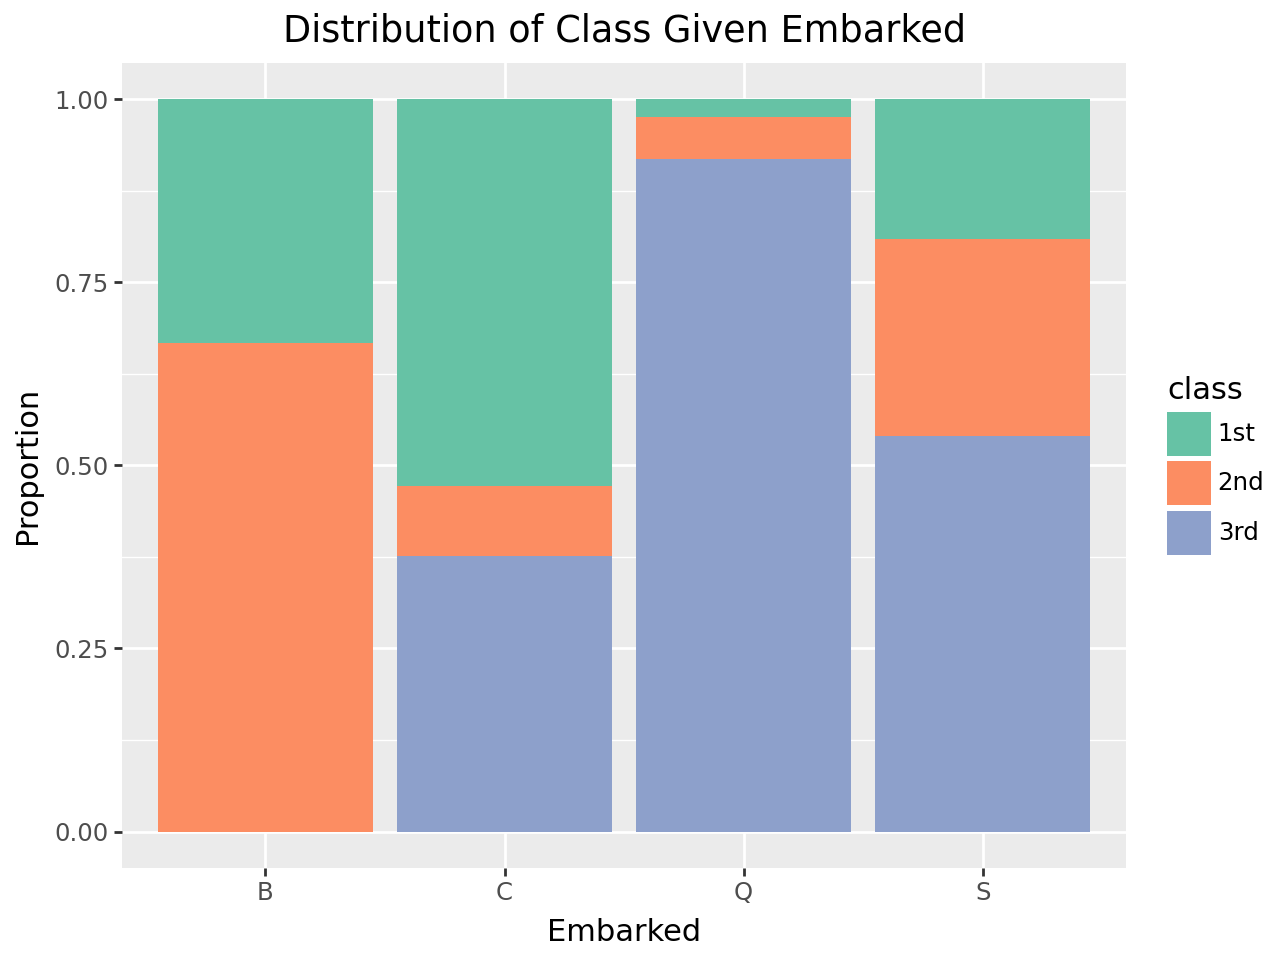

In [14]:
from plotnine import ggplot, aes, geom_bar, position_stack, labs, scale_fill_brewer

(ggplot(reset, aes(x='embarked', y='proportion', fill='class'))
 + geom_bar(stat='identity', position=position_stack())
 + labs(title='Distribution of Class Given Embarked', x='Embarked', y='Proportion')
 + scale_fill_brewer(type='qual', palette='Set2'))   # Try 'Set1', 'Dark2', etc.



This stacked bar chart is an easier representation to visualize for distribution. While the conditional distribtuion tables show the exact proportion for each class and embark. The visual makes it easier to see where the majority of each class embarked from. The pros are easier viewing, but less accurate on proportion values.